Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # useful for creating plots
import seaborn as sns #useful for crwating plots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the data  from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
# inspecting the first five rows of the dataframe
car_dataset.head() # head function will print the first five rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [8]:
# getting some information about the dataset
car_dataset.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]>

In [9]:
# checking the no. of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [13]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding the categorical data

In [14]:
# encoding fuel type column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

<ipython-input-14-83015f2c7521>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)


In [33]:
# encoding seller_type column
car_dataset.replace({'seller_type':{'Dealer':0 ,'Individual':1,'Trustmark Dealer':2}},inplace=True)

<ipython-input-33-ac820627d8c6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0 ,'Individual':1,'Trustmark Dealer':2}},inplace=True)


In [45]:
#encoding transmission column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#Encoding the 'owner' column
car_dataset.replace({'owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace=True)

<ipython-input-45-31663e5e551c>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace=True)


In [46]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


Splitting data and target

In [47]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']


In [48]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [49]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Train_Test data

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1 , random_state=2)

Model Training

Linear Regression

In [51]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [52]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [53]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [54]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42763612850186783


Visualize the actual price and predicted prices

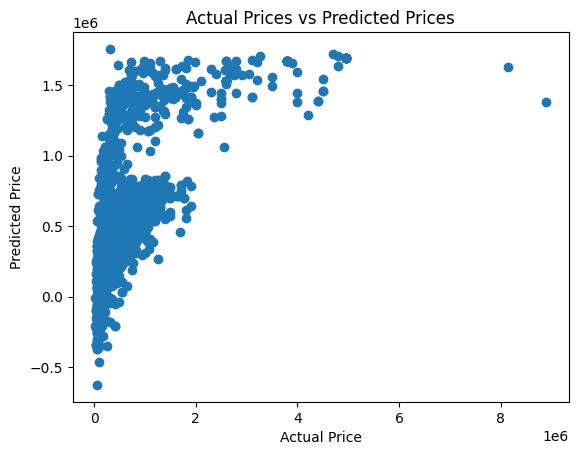

In [55]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [56]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [57]:
# R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5027999353753417


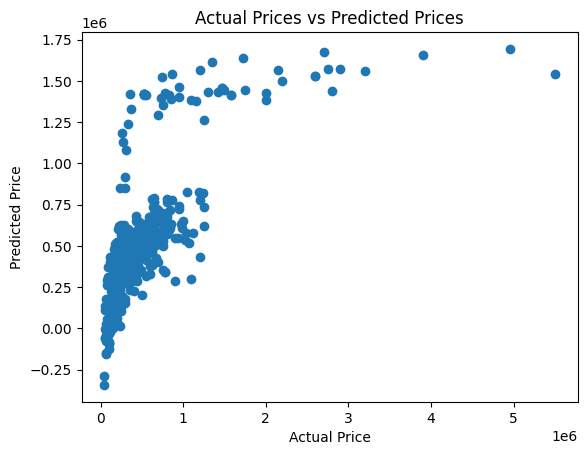

In [58]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [59]:
# loading the lasso regression model
lasso_reg_model= Lasso()

In [60]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [61]:
#prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [62]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42763612844686605


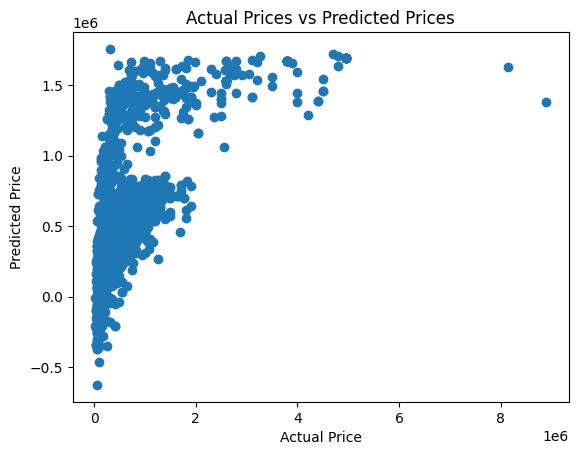

In [63]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [64]:
# prediction on test data
test_data_prediction = lasso_reg_model.predict(X_test)

In [65]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5027994839428178


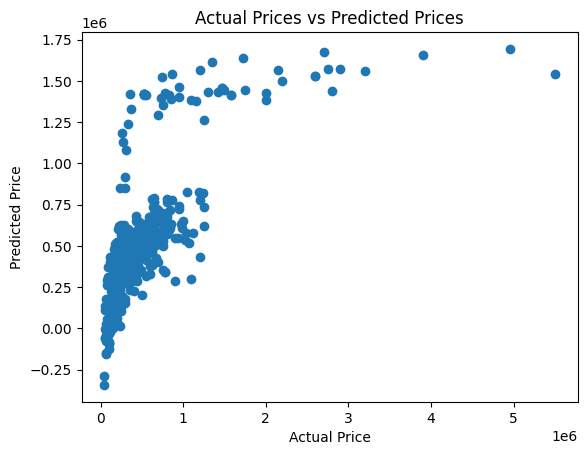

In [66]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()